In [2]:
import numpy as np
import captum
from captum.attr import visualization as viz

from utils import load_model_pth, ImageLoader, GuidedGradCamAlgorithm, CaptumVisualizer

In [3]:
model = load_model_pth('convnext_base', num_classes=2, model_dir='../models/convnext_base.pth')
model.eval()

ConvNeXt(
  (stem): Sequential(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
  )
  (stages): Sequential(
    (0): ConvNeXtStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (norm): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=128, out_features=512, bias=True)
            (act): GELU(approximate=none)
            (drop1): Dropout(p=0.0, inplace=False)
            (fc2): Linear(in_features=512, out_features=128, bias=True)
            (drop2): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
        )
        (1): ConvNeXtBlock(
          (conv_dw): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (norm): LayerNorm((128,), e

In [4]:
imageloader = ImageLoader('../input/PNEUMONIA/person1949_bacteria_4880.jpeg', photo_size=224)

In [5]:
captumviz = CaptumVisualizer(imageloader)

/Users/mitsutaka/.pyenv/versions/anaconda3-2021.11/envs/pytorch/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/mitsutaka/.pyenv/versions/anaconda3-2021.11/envs/pytorch/lib/python3.9/site-packages/captum/attr/_core/guided_backprop_deconvnet.py:64: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  warnings.warn(


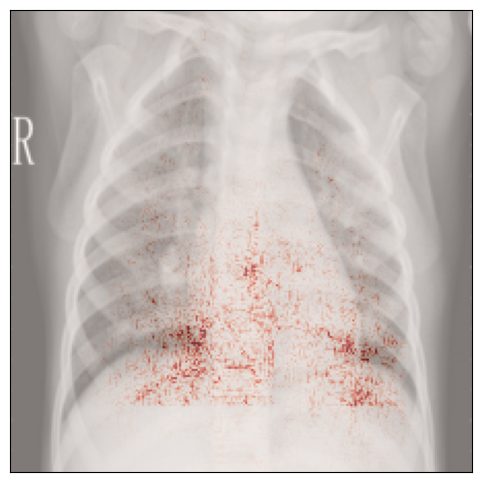

In [6]:
_ = captumviz.visualization_img_attr(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    method='blended_heat_map',
    cmap='Reds'
)

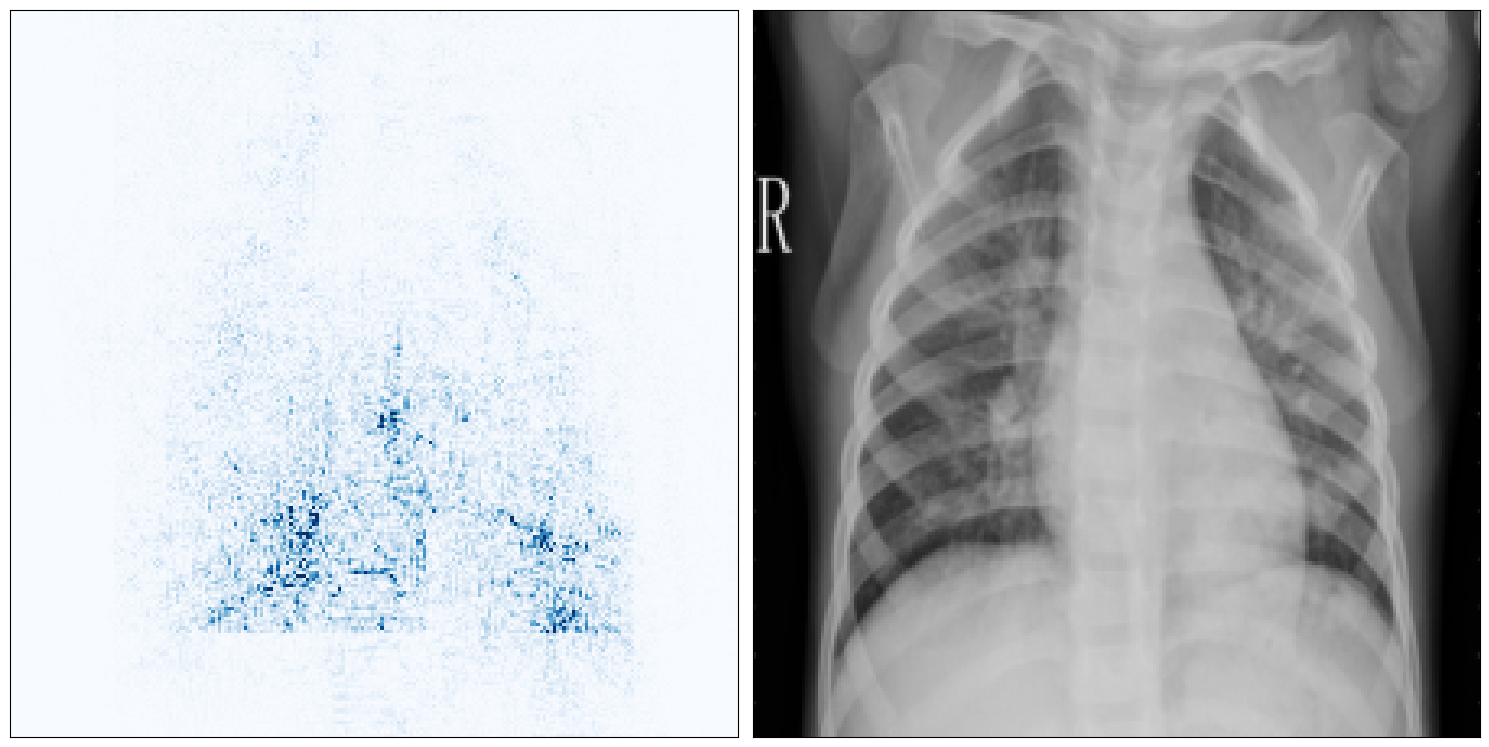

In [7]:
_ = captumviz.visualization_image_attr_multiple(
    GuidedGradCamAlgorithm(model, model.stages[3].blocks[2].drop_path),
    target=0,
    methods=["heat_map", "original_image"],
    signs = ["absolute_value", "all"],
    fig_size=(15, 15)
    )